<a href="https://colab.research.google.com/github/marco-milanesi/dynamic-weighing/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic weighing

In [1]:
!wget https://raw.githubusercontent.com/marco-milanesi/dynamic-weighing/main/weight_data.CSV

--2021-11-11 09:16:14--  https://raw.githubusercontent.com/marco-milanesi/dynamic-weighing/main/weight_data.CSV
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67183 (66K) [text/plain]
Saving to: ‘weight_data.CSV’

weight_data.CSV     100%[===================>]  65.61K  --.-KB/s    in 0.03s   

2021-11-11 09:16:14 (2.17 MB/s) - ‘weight_data.CSV’ saved [67183/67183]



# Polinomial Regression

## Import packages


In [2]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

## Loading Data

In [3]:
data = pd.read_csv('weight_data.CSV',sep=';')
print("Loaded: ",len(data))
y = data.values[:,0]
x = data.values[:,1:]
data

Loaded:  199


,Real Weight,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28
0,30,20.216734,20.591473,20.862815,21.082876,21.961170,23.008404,23.845369,25.852810,26.715498,28.738822,30.448866,30.165725,30.183971,28.252478,27.310475,25.953428,24.757809,24.057983,22.055484,20.114541,18.020647,17.390114,16.260420,14.431770,13.011104,11.320964,9.454773,8.205822
1,30,16.358580,17.948475,18.922227,19.341220,21.115006,22.996339,24.455895,26.089258,26.648218,28.489740,30.408361,30.405284,30.645241,29.286754,27.523205,25.633204,24.104316,23.409304,21.381818,21.141492,21.090736,20.030618,19.561854,17.596822,16.664926,14.639496,13.310592,11.921294
2,30,18.541974,19.393415,20.715872,20.794711,22.889283,24.044060,26.136841,26.822618,27.214711,28.648734,30.426228,30.811116,30.820215,30.439926,29.654349,28.919307,28.020054,25.840811,24.443338,23.255630,22.971649,21.885108,20.566558,20.156233,19.965342,17.914060,16.444254,15.250845
3,30,20.787830,21.712560,22.535063,23.615610,23.774196,24.938504,25.094124,26.149732,27.474697,29.129782,30.829622,30.343048,30.246423,29.857620,29.061254,27.445913,25.505077,25.278630,23.310526,21.513120,21.232630,20.735228,19.619537,17.569506,15.922942,14.703486,13.911107,13.233322
4,30,19.093744,20.634477,22.173730,22.392791,24.472763,25.323968,26.163234,27.975422,28.422492,28.663653,30.809908,30.392548,30.425185,28.969535,27.280572,25.419597,23.974121,23.526355,22.226838,20.443481,19.058634,17.707083,17.314882,17.232952,15.219103,13.907085,12.982010,11.025349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,75,65.469745,66.226849,66.500694,67.950649,70.017205,72.136103,73.023895,74.024775,74.558542,75.504318,75.641807,75.662575,75.874149,74.836788,74.240227,72.767795,71.826029,70.552868,70.490923,69.868137,69.693539,69.000679,67.005969,65.442489,64.641583,63.846277,63.783857,63.573616
195,75,63.816733,65.954598,65.964267,67.488364,68.382093,69.499717,71.276521,72.145537,72.694650,74.360400,75.925086,75.013339,75.349237,74.593905,72.901164,70.889756,70.762950,69.596962,69.064516,69.035449,68.610923,67.479043,66.771656,66.558410,65.700983,65.266628,64.743208,63.316108
196,75,65.786215,67.721361,69.824838,70.310168,71.307659,71.326052,72.050010,72.425910,73.954595,74.459107,75.541380,75.575889,75.091932,74.887379,73.002921,71.046006,70.949416,69.092364,67.873424,67.583285,67.507667,66.331702,65.345967,64.932141,63.734362,62.168726,60.683706,58.759285
197,75,62.688483,64.184743,65.896784,67.294109,67.385624,68.396841,70.167959,71.637006,73.780966,73.942565,75.752993,75.030943,75.166614,73.662947,72.206403,71.847554,70.725120,70.437576,70.340370,69.493374,69.205394,67.770324,67.510636,65.492426,63.440658,61.856313,61.186599,61.010450


Before training the model I split into train and testing model (with stratification)

In [4]:
from collections import Counter
print("Labels distribution:",Counter(y))

# train-test split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, random_state=30,stratify=y,train_size=0.5)
print("Train labels distribution:", Counter(y_train))
print("Test labels distribution:",Counter(y_test))




Labels distribution: Counter({70.0: 21, 35.0: 20, 40.0: 20, 45.0: 20, 50.0: 20, 55.0: 20, 60.0: 20, 75.0: 20, 30.0: 19, 65.0: 19})
Train labels distribution: Counter({55.0: 10, 60.0: 10, 75.0: 10, 45.0: 10, 35.0: 10, 40.0: 10, 30.0: 10, 70.0: 10, 50.0: 10, 65.0: 9})
Test labels distribution: Counter({70.0: 11, 60.0: 10, 75.0: 10, 50.0: 10, 40.0: 10, 45.0: 10, 55.0: 10, 65.0: 10, 35.0: 10, 30.0: 9})


## Train the model

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)
linreg = LinearRegression()

linreg.fit(x_poly, y)
y_pred = linreg.predict(x_poly)

ValueError: ignored

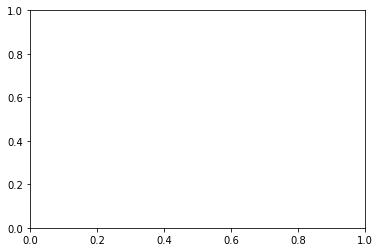

In [19]:
import matplotlib.pyplot as plt

plt.scatter(x,y, color='blue')
plt.plot(x,y_pred, color ='red')

## Evaluate the model

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.999771922195373